In [1]:
import pandas as pd
import requests
from openpyxl import load_workbook
import datetime
from jupyterthemes.jtplot import style

style("onedork")

In [2]:
url = "https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Sterbefaelle-Lebenserwartung/Tabellen/sonderauswertung-sterbefaelle.xlsx?__blob=publicationFile"

In [3]:
filepath = url.split("/")[-1].split("?")[0]
filepath

'sonderauswertung-sterbefaelle.xlsx'

In [4]:
r = requests.get(url)

open(filepath, 'wb').write(r.content)

850121

In [5]:
sheet_name = load_workbook(filepath).sheetnames[3]
sheet_name

/home/g/venvs/pandas/lib/python3.9/site-packages/openpyxl/reader/drawings.py:59: UserWarning: wmf image format is not supported so the image is being dropped
  warn(msg)


'D_2016_2021_Tage'

In [6]:
df = pd.read_excel(
    io=filepath, 
    sheet_name=sheet_name,
    header=8,
    index_col=0,
)

In [7]:
drange = pd.date_range(
    start=datetime.date(2016, 1, 1), 
    end=datetime.date.today()
)

In [8]:
s = pd.Series(
    data=(df[d.strftime("%d.%m.")][int(d.strftime("%Y"))] for d in drange),
    index=drange
).dropna().astype(int)

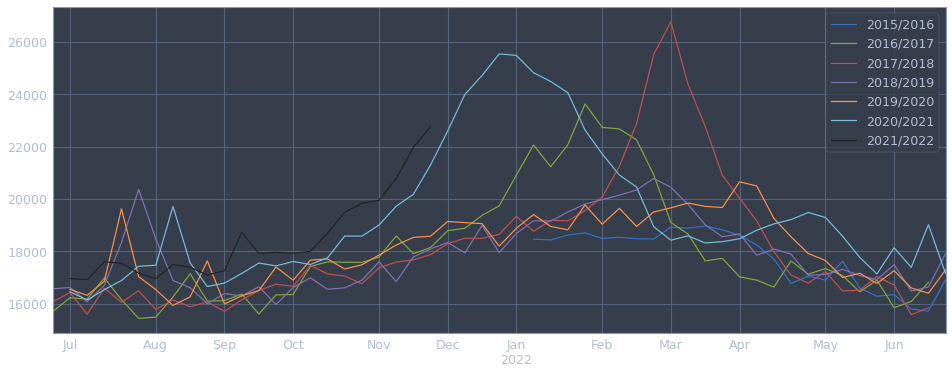

In [9]:
for y,df in s.resample("w").sum()[1:].groupby(lambda s:(s.year + (s.month / 12) - 7/12).astype(int)):
    df.index += datetime.timedelta(days=365*(2021 - y))
    df.plot(label=f"{y}/{y+1}",legend=True, figsize=(16,6))